# Statistics Packages : Numpy, Matplotlib & Scipy

## Numpy : Make Array & Basic Statistics

In [1]:
# Import
import numpy as np

<p style='text-align:center'><b>Mathematics Score</b></p>
<ul style='text-align:center'>
<li>100</li>
<li>90</li>
<li>95</li>
<li>83</li>
<li>78</li>
</ul>

In [2]:
# Array
score = np.array([100, 90, 95, 83, 78])

In [3]:
# 평균
score.mean()

89.200000000000003

In [4]:
# 표준편차
score.std()

7.9347337699509488

## Matplotlib : Plot & Graph

In [5]:
# import
import matplotlib.pyplot as plt

* 위에서 array의 개수가 5개였으므로 똑같이 5개의 array를 만들어준다.

In [6]:
X = ('A','B','C','D','E')
X_pos = np.arange(len(X))

In [7]:
print(X, X_pos)

('A', 'B', 'C', 'D', 'E') [0 1 2 3 4]


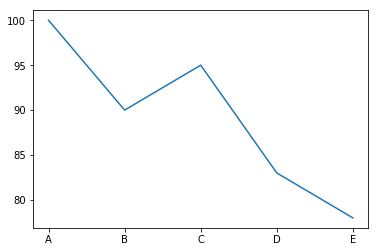

In [8]:
plt.plot(X_pos, score)
plt.xticks(X_pos, X)
plt.show()

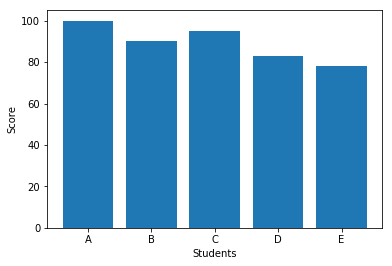

In [9]:
plt.bar(X_pos, score)
plt.xticks(X_pos, X)
plt.xlabel('Students')
plt.ylabel('Score')
plt.show()

## Scipy : Statistic Package for Python

In [10]:
import scipy as sp
import scipy.stats as ss

In [11]:
# Z 값 구하기
score_z = ss.zscore(score)
print(score_z)

[ 1.36110427  0.10082254  0.7309634  -0.78137467 -1.41151554]


In [12]:
print(score_z.mean(),score_z.std()) # 표준정규분포는 평균이 0, 표준편차가 1

-3.99680288865e-16 1.0


In [13]:
# Z값을 퍼센트로 변환
percent_z = ss.norm.cdf(score_z)

In [14]:
percent_z

array([ 0.91325963,  0.54015433,  0.76759925,  0.21729108,  0.07904633])

<img src='https://i.stack.imgur.com/fGYNp.png' alt='Example'></img>

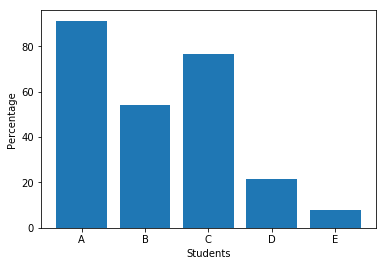

In [15]:
plt.bar(X_pos, percent_z * 100) # 곱하기 100을 해야 정확한 퍼센트가 나옴.
plt.xticks(X_pos, X)
plt.ylabel('Percentage')
plt.xlabel('Students')
plt.show()

### Example : Confidence Interval

In [16]:
score = np.array([100, 90, 95, 83, 78])

In [17]:
m = score.mean() # 평균
sig = score.std() # 표준편차
print(m, sig)

89.2 7.93473376995


In [18]:
from math import sqrt

In [19]:
sig = sig/sqrt(len(score))

In [20]:
print(m, sig)

89.2 3.54852081859


In [21]:
inv = ss.norm.interval(0.95, m, sig) # 95% 신뢰구간

In [22]:
inv

(82.245026997163805, 96.154973002836201)

In [23]:
inv2 = ss.norm.interval(0.99, m, sig) # 99% 신뢰구간

In [24]:
inv2

(80.059616091210444, 98.340383908789562)

### Example : Binary Distribution (Roll Dice)

#### Q. 주사위를 1200번 던졌을 때, 1이 224번 이상 나올 확률은?

In [25]:
n, p = 1200, 1/6

In [26]:
m_bin = ss.binom.mean(n, p) # 평균
sig_bin = ss.binom.std(n, p) # 표준편차
print(m_bin, sig_bin)

200.0 12.9099444874


\begin{equation}
P(X\geq a) = P(Z\geq \frac{a - m}{\sigma} )
\end{equation}

In [27]:
z_bin = (224 - m_bin)/sig_bin

In [28]:
print(z_bin)

1.85903200618


In [29]:
prob_bin = ss.norm.cdf(z_bin)
print(prob_bin)

0.968488699085


In [30]:
ans = 1 - prob_bin
print('Answer: ', ans)

Answer:  0.0315113009155


In [31]:
from random import gauss

In [32]:
x = [gauss(m_bin, sig_bin) for i in range(10000)]
fit_x = ss.norm.pdf(x, m_bin, sig_bin) # 확률값 만들어줌 -> 정규분포

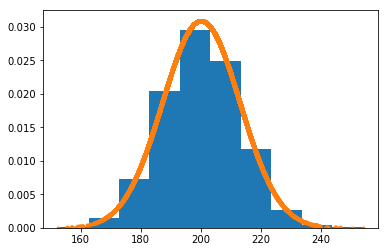

In [33]:
plt.hist(x, normed=True)
plt.plot(x, fit_x, '.')
plt.show()

### Example : 국어 80점과 수학 70점 중에 잘 본 과목은?

* 주어진 데이터 : 국어 - 평균 50, 표준편차 10 / 수학 - 평균 40, 표준편차 15

In [34]:
def zetify(value, mean, std):
    return (value - mean)/std

In [35]:
lang_z = zetify(80, 50, 10)
math_z = zetify(70, 40, 15)
print(lang_z, math_z)

3.0 2.0


In [36]:
lang_x = [gauss(50, 10) for i in range(10000)]
math_x = [gauss(40, 15) for i in range(10000)]
lang_fit = ss.norm.pdf(lang_x, 50, 10)
math_fit = ss.norm.pdf(math_x, 40, 15)

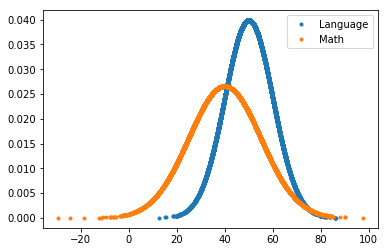

In [37]:
plt.plot(lang_x, lang_fit, '.')
plt.plot(math_x, math_fit, '.')
plt.legend(['Language', 'Math'])
plt.show()